In [25]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [14]:
time_steps = np.arange(-10,10,0.01)
y_position = np.append(np.arange(100,0,-0.1), np.arange(0,100, 0.1), axis=0)

In [15]:
model = Sequential()

model.add(Dense(50, input_shape=(1,), activation="relu"))

model.add(Dense(50, input_shape=(50,), activation="relu"))
model.add(Dense(50, input_shape=(50,), activation="relu"))

model.add(Dense(1, input_shape=(50,), activation="relu"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss="mse")

with tf.device('/device:GPU:0'):
    model.fit(time_steps, y_position, epochs=50)

print("The final loss value is {}".format(model.evaluate(time_steps, y_position)))

Epoch 1/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 5.4285e-04
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 4.7973e-04
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 4.2509e-04
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 3.2276e-04
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 1.0769e-04
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 2.5847e-05
Epoch 9/50
63/63 [==============================] - 0s 2ms/step - loss: 2.0479e-05
Epoch 10/50
63/63 [==============================] - 0s 2ms/step - loss: 1.9300e-05
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 1.7794e-05
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 1.6436e-05
Epoch 13/

In [26]:
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1), model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")
  plt.show()

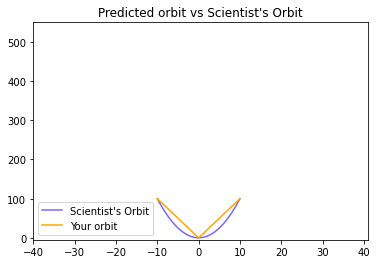

In [27]:
twentymin_orbit = model.predict(np.arange(-10,11))

plot_orbit(twentymin_orbit)

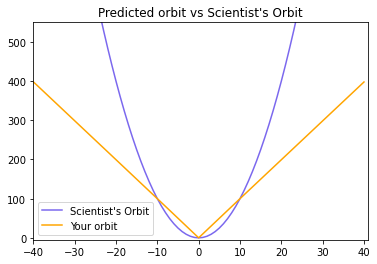

In [28]:
fourtymin_orbit = model.predict(np.arange(-40,41))

plot_orbit(fourtymin_orbit)